In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import interpolate

In [2]:
y_custom = np.array([0, 1, 2, 4, 8, 9, 9.25, 9.5, 9.25, 9, 8, 6, 4, 3, 2.5, 2, 1.75, 1.5, 1.25, 1, 0.75, 0.5, 0])
x = np.arange(0, len(y_custom))

label = np.zeros(len(y_custom))
label = np.where(y_custom <=4, label, 1)

mu, sigma = np.mean(y_custom), np.std(y_custom)
y_gauss = stats.norm.pdf(x, mu, sigma)

y_custom /= np.sum(y_custom)
func = interpolate.interp1d(x, y_custom)

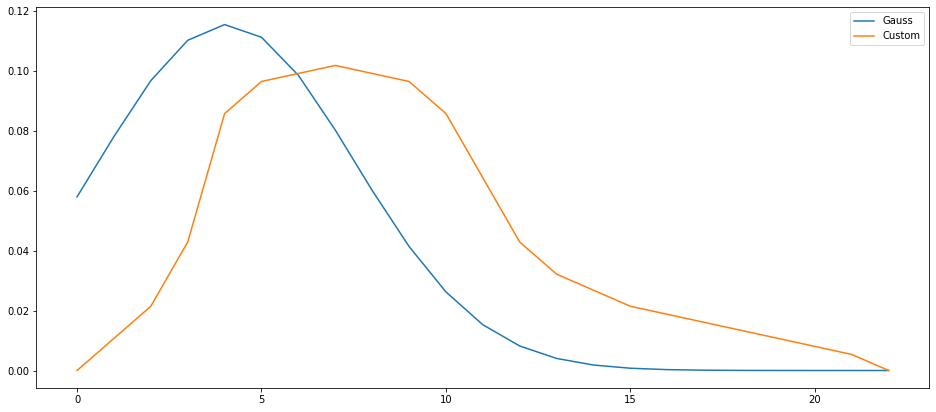

In [3]:
fig = plt.figure(figsize=(16, 7))
plt.plot(x, y_gauss)
plt.plot(x, func(x))
plt.legend(["Gauss", "Custom"]);

In [4]:
x1 = np.random.uniform(0, 9.5)

p0_apriori = np.sum(label) / len(y_custom)
p1_apriori = 1 - p0_apriori
y1_gauss = stats.norm.pdf(x1, mu, sigma)
evidenz = y1_gauss * p0_apriori + y1_gauss * p1_apriori
p0_aposteriori = (y1_gauss * p0_apriori) / evidenz
p1_aposteriori = (y1_gauss * p1_apriori) / evidenz
print("Gauss")
print(f"Apriori: {p0_apriori}, {p1_apriori}")
print(f"Aposteriori: {p0_aposteriori, p1_aposteriori}")

Gauss
Apriori: 0.34782608695652173, 0.6521739130434783
Aposteriori: (0.34782608695652173, 0.6521739130434783)


In [5]:
p0_apriori = np.sum(label) / len(y_custom)
p1_apriori = 1 - p0_apriori
y1_custom = func(x1)
evidenz = y1_custom * p0_apriori + y1_custom * p1_apriori
p0_aposteriori = (y1_custom * p0_apriori) / evidenz
p1_aposteriori = (y1_custom * p1_apriori) / evidenz
print("Custom")
print(f"Apriori: {p0_apriori}, {p1_apriori}")
print(f"Aposteriori: {p0_aposteriori, p1_aposteriori}")

Custom
Apriori: 0.34782608695652173, 0.6521739130434783
Aposteriori: (0.3478260869565217, 0.6521739130434783)
